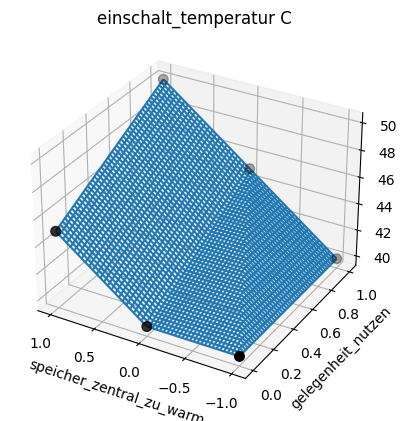

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import SmoothBivariateSpline, LinearNDInterpolator

# x = np.array([1,1,1,2,2,2,4,4,4])
# y = np.array([1,2,3,1,2,3,1,2,3])
# z = np.array([0,7,8,3,4,7,1,3,4])

x = np.array([-1,-1, 0,0,1,1])
y = np.array([0,1,0,1,0,1])
z = np.array([40, 40,40,45,45,50])

xy = np.c_[x, y]   # or just list(zip(x, y))
lut2 = LinearNDInterpolator(xy, z)

X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title("einschalt_temperatur C")

ax.plot_wireframe(X, Y, lut2(X, Y))
ax.invert_xaxis()
ax.axes.set_xlabel("speicher_zentral_zu_warm")
#ax.invert_yaxis()
ax.axes.set_ylabel("gelegenheit_nutzen")
ax.scatter(x, y, z,  'o', color='k', s=48)

Text(0.5, 0.5, 'gelegenheit_nutzen')

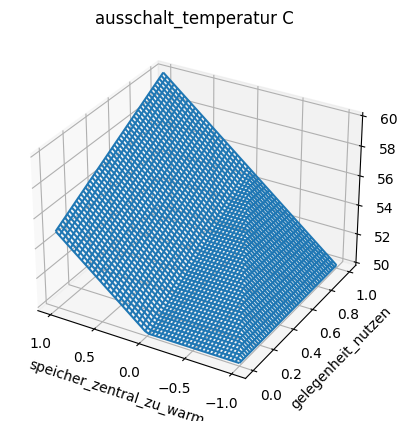

In [2]:
hysterese = 10
speicher_dezentral_maximaltemperatur = 65
z_ausschalten = np.minimum ( speicher_dezentral_maximaltemperatur, z+hysterese)


lut2_ausschalt = LinearNDInterpolator(xy, z_ausschalten)



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title("ausschalt_temperatur C")

ax.plot_wireframe(X, Y, lut2_ausschalt(X, Y))
ax.invert_xaxis()
ax.axes.set_xlabel("speicher_zentral_zu_warm")
#ax.invert_yaxis()
ax.axes.set_ylabel("gelegenheit_nutzen")
#ax.scatter(x, y, z,  'o', color='k', s=48)

Text(0.5, 0.5, 'gelegenheit_nutzen')

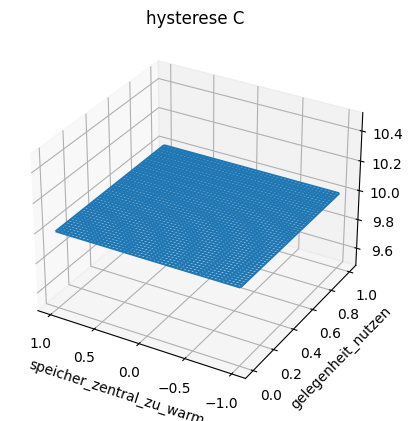

In [3]:
lut2_hysterese = LinearNDInterpolator(xy, z_ausschalten-z)



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title("hysterese C")

ax.plot_wireframe(X, Y, lut2_hysterese(X, Y))
ax.invert_xaxis()
ax.axes.set_xlabel("speicher_zentral_zu_warm")
#ax.invert_yaxis()
ax.axes.set_ylabel("gelegenheit_nutzen")
#ax.scatter(x, y, z,  'o', color='k', s=48)

Fernleitung_hot immer 10C höher als höchste aktive ausschaltschwelle

Legionellen: falls nahe am Ausschalten und alles ist warm und legionellenzeit ist nah : ausschaltschwelle von allen rauf.
    falls nahe am einschalten: ausschaltschwelle wieder runter
    nahe am ausschalten: ausschaltwelle wieder rauf
    bis alle genügend hatten

Sommer: ein ofen brennt, nahe am ausschalten (die kalten haben genügend wärme) 
    ausschalttemperatur alle auf 55C
    alle speicher öffnen, weil last zu gross für einen ofen: pumpe geht in intervallbetrieb
